<a href="https://colab.research.google.com/github/Pakhi27/Mel-Spectograms./blob/main/Mel_Spectograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt


Loading audio files with Librosa


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
soft_piano="/content/drive/MyDrive/soft-piano-100-bpm-121529.mp3"

In [4]:
ipd.Audio(soft_piano)

In [5]:

# load audio files with librosa
scale, sr = librosa.load(soft_piano)

Mel filter banks

In [6]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
# frame size,sample rate,number of mel bands

In [7]:
filter_banks.shape
# (no of mel bands,nyqistfreq/2+1)

(10, 1025)

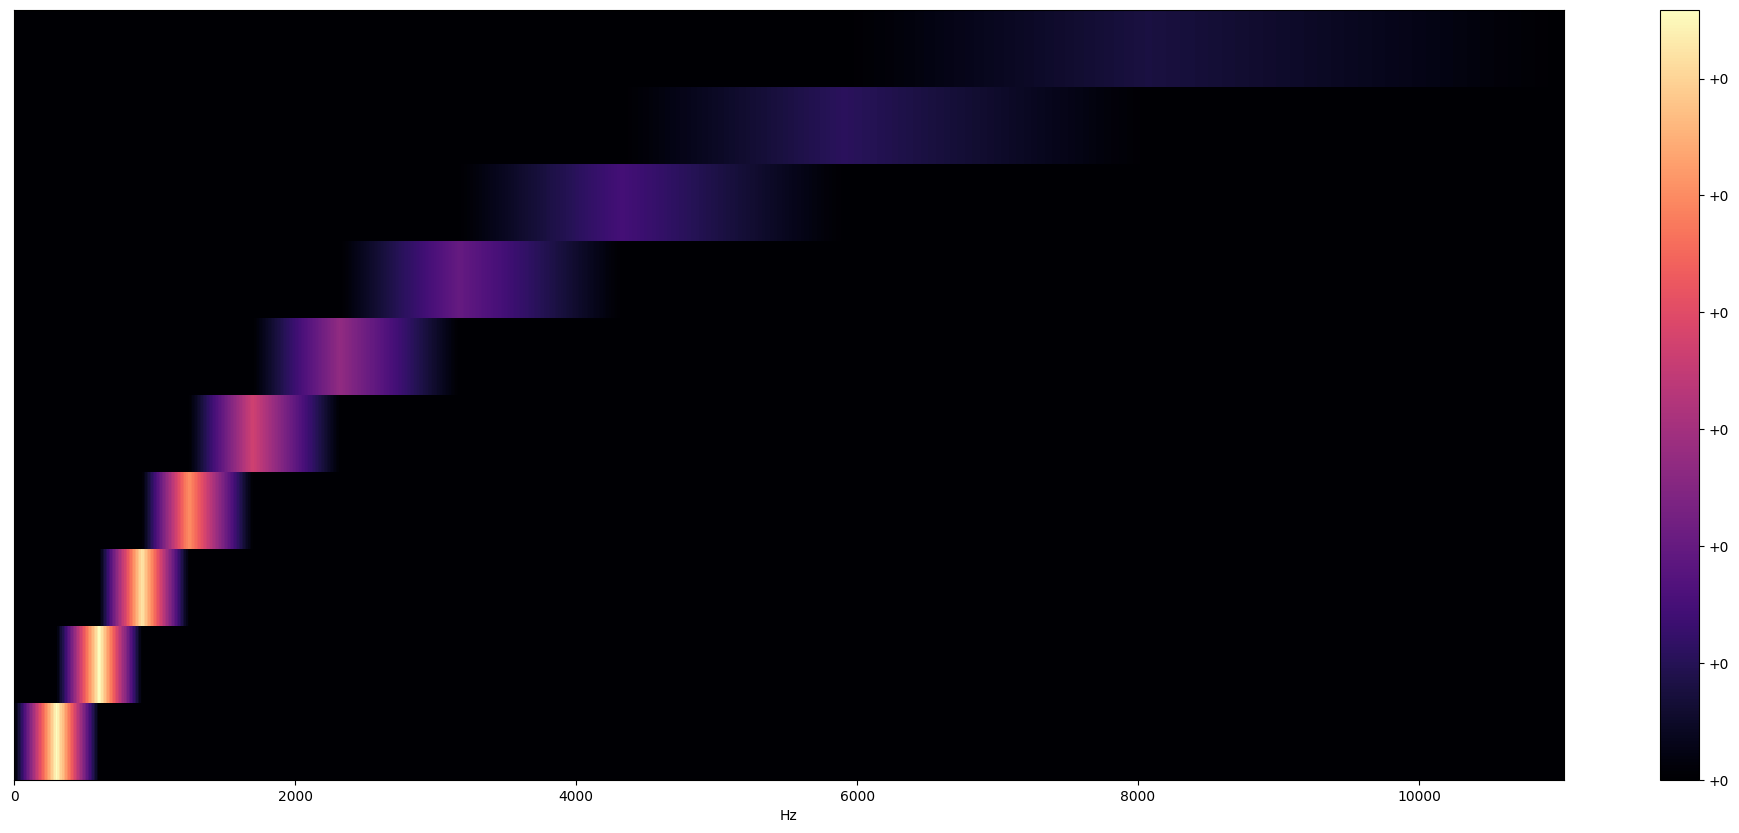

In [8]:
plt.figure(figsize=(25, 10))
# specshow-for displaying spectograms..
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()
# 10 diff mel bands
#  color corresponds to weight of mel band a certain freq
# yellow-central freq of a mel band

Extracting Mel Spectrogram

In [11]:

# Compute the Short-Time Fourier Transform (STFT)
S = librosa.stft(scale, n_fft=2048, hop_length=512)

In [12]:
import numpy as np

In [13]:
# Convert the amplitude to decibels (log scale)
S_piano = librosa.amplitude_to_db(np.abs(S), ref=np.max)

In [14]:
# Extract vanilla spectogram and apply mel filter on it.basically do the multiplication of both to get mel spectograms
mel_spectrogram = librosa.feature.melspectrogram(S=S, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

In [15]:
mel_spectrogram.shape
# (bands,frames extracted from the signal)

(10, 831)

In [16]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
# converting tom log
# way we perceive freq is logarithmic not linear

<ipython-input-16-4fb314dbbcb3>:1: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)


In [17]:
log_mel_spectrogram.shape

(10, 831)

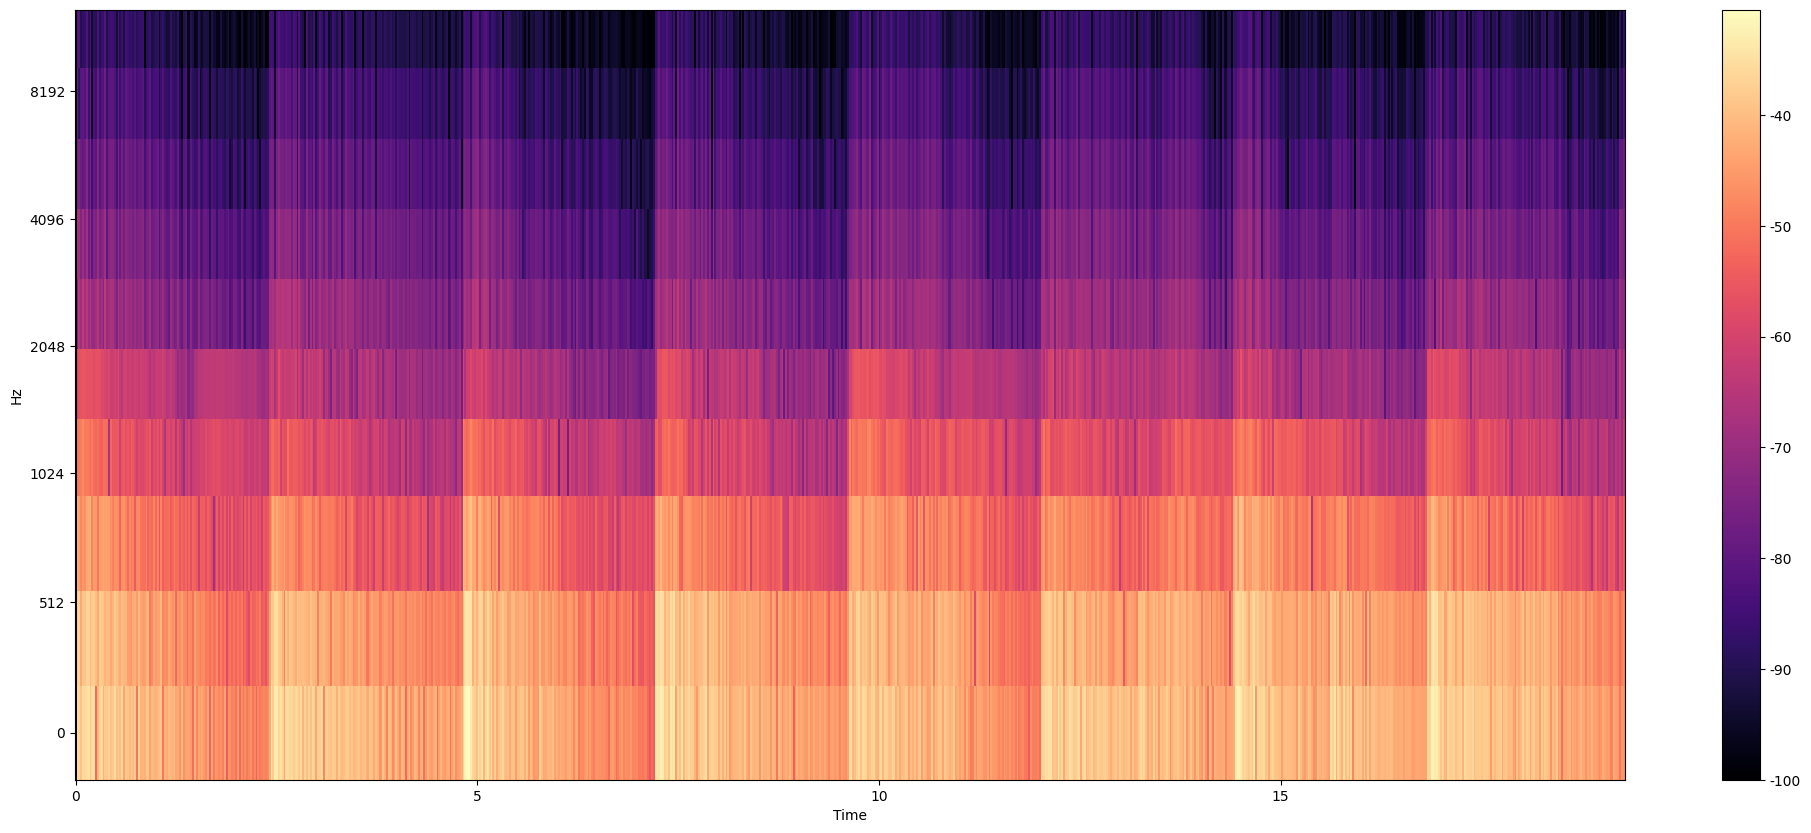

In [18]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()